**Learner Name: Damian Najera**

# Introduction to Neural Networks: Bank Churn prediction

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer
 
* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location 
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer 
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary 

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values 
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## **Please read the instructions carefully before starting the project.** 

This is a commented Python Notebook file in which all the instructions and tasks to be performed are mentioned. 

* Blanks '_______' are provided in the notebook that need to be filled with an appropriate code to get the correct result

* With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space

* Identify the task to be performed correctly and only then proceed to write the required code

* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code"

* Running incomplete code may throw an error

* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors

* Add the results/observations derived from the analysis in the presentation and submit the same in .pdf format

## Importing necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
# Library to split data
from sklearn.model_selection import train_test_split
# Library to encode the variables
from sklearn import preprocessing
# To plot confusion matrix
from sklearn.metrics import confusion_matrix
# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# library to import to standardize the data
from sklearn.preprocessing import StandardScaler
#To import different metrics 
from sklearn import metrics
from tensorflow.keras import backend
# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")
# importing different functions to build models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier
import tensorflow as tf
# importing GridSearch CV
from sklearn.model_selection import GridSearchCV
# importing roc_curve to plot
from sklearn.metrics import roc_curve
from matplotlib import pyplot
# importing SMOTE
from imblearn.over_sampling import SMOTE
# importing metrics
from sklearn import metrics
import random
#Importing classback API
from keras import callbacks

## Loading the dataset

In [2]:
data = pd.read_csv("Churn.csv")  # Complete the code to read the dataset 

## Data Overview

The initial steps to get an overview of any dataset is to: 
- Observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- Get information about the number of rows and columns in the dataset
- Find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- Check the statistical summary of the dataset to get an overview of the numerical columns of the data

### View the first and last 5 rows of the dataset.

In [3]:
data.head() ## Complete the code to display the first 5 rows of the dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.tail() ## Complete the code to display the last 5 rows of the dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


### Understand the shape of the dataset

In [5]:
# checking shape of the data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 10000 rows and 14 columns.


### Check the data types of the columns for the dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Creating a copy of original data

In [7]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

### Checking the Statistical Summary

In [8]:
# Let's look at the statistical summary of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


#### Observations:
- The credit scores range from 350 to 850.
- Customers' ages vary from 18 to 92.
- Tenure with the bank spans from 0 to 10 years.
- The balance column has a minimum value of 0, indicating some customers have no balance.
- The number of products customers have ranges from 1 to 4.
- About 70.5% of customers have a credit card.
- Approximately 51.5% are active members.

### Checking for unique values for each of the column

In [9]:
# checking the number of unique values in each column
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

### Checking for Missing Values

In [10]:
# checking for missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#### Observations:
There are no missing values in the dataset. 

### Drop the columns which are unique for all users like IDs, surnames, and rownumbers

In [11]:
# RowNumber , CustomerId and Surname are unique hence drop them
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1) 

## Exploratory Data Analysis

### Univariate Analysis

In [12]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [13]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on CreditScore

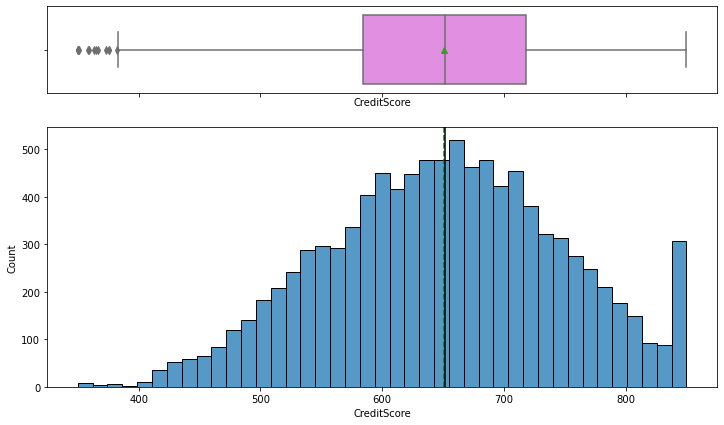

In [14]:
histogram_boxplot(df,'CreditScore')

#### Observations:
- The histogram suggests that the distribution of credit scores is roughly normal with a slight left-skew.
- The boxplot above the histogram shows the presence of a few lower outliers (below the lower whisker). This indicates that there are some customers with exceptionally low credit scores compared to the majority.
- Most of the credit scores lie between approximately 400 and 850, with the highest concentration of scores around the 650 mark.

#### Observations on Age

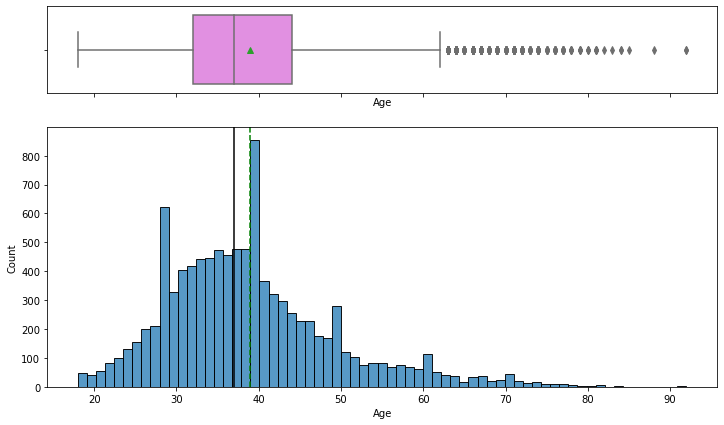

In [15]:
histogram_boxplot(df, 'Age') 

#### Observations:
- The distribution of ages is right-skewed, indicating that there are more younger customers compared to older ones.
- The boxplot above the histogram shows the presence of some upper outliers (above the upper whisker). This suggests that there are a few customers who are significantly older compared to the majority of the bank's clientele.
- The majority of customers are aged between roughly 20 and 60 years.
- There's a high concentration of customers in the age range of 30 to 40 years.

#### Observations on Balance

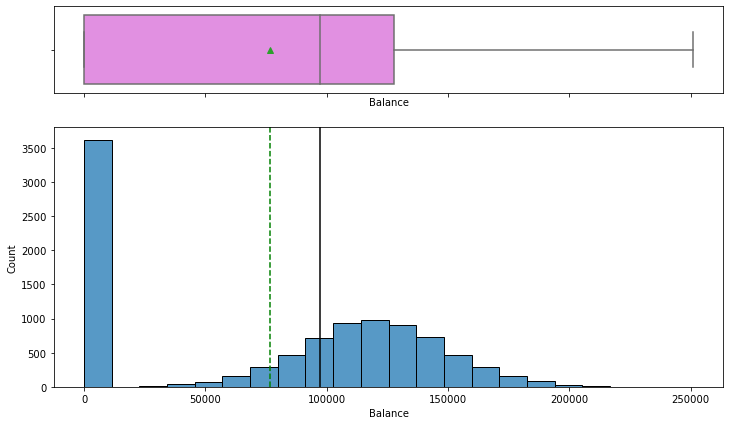

In [16]:
histogram_boxplot(df, 'Balance')

#### Observations:
-  There are two prominent peaks in the distribution of balances. One peak is near zero, and the other is around the middle of the range, approximately at 100,000. This could suggest there are two distinct groups of customers - those who maintain a low or zero balance and those who maintain a moderate balance around the 100,000 mark.
- A significant number of customers have a balance close to zero. This might indicate that many customers either have emptied their accounts or haven't used them actively.
- There don't appear to be any significant outliers on either end of the distribution.
- Most customers have balances ranging from 0 to approximately 250,000.

#### Observations on Estimated Salary

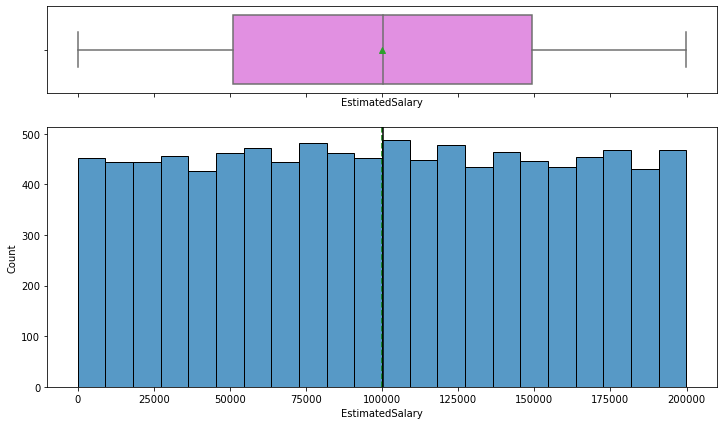

In [17]:
histogram_boxplot(df, 'EstimatedSalary')         

#### Observations:
- The distribution of estimated salaries is fairly uniform. This means that customers are spread out evenly across different salary levels.
- There don't appear to be any significant outliers on either end of the distribution, which aligns with the uniform distribution.
- Customers have estimated salaries ranging from almost 0 to just above 200,000, with an even distribution across this range.

#### Observations on Exited

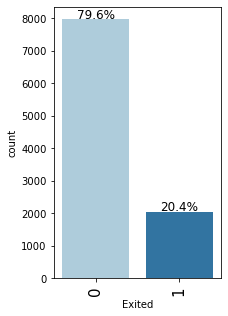

In [18]:
labeled_barplot(df, "Exited", perc=True)

#### Observations:
- Approximately 79.6% of customers (labeled as "0") did not leave the bank.
- Around 20.4% of customers (labeled as "1") exited the bank.

#### Observations on Geography

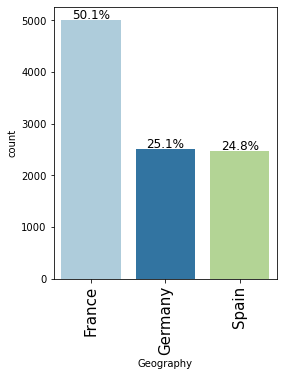

In [19]:
labeled_barplot(df, 'Geography', perc=True)

#### Observations:
- The majority of customers, approximately 50.1%, are from France.
- Around 25.1% of customers are from Germany.
- About 24.8% of customers are from Spain.

#### Observations on Gender

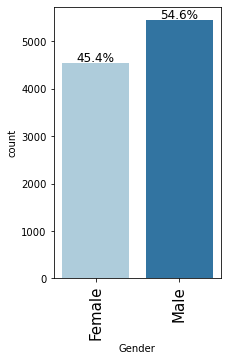

In [20]:
labeled_barplot(df, 'Gender', perc=True)

#### Observations:
- Approximately 54.6% of the bank's customers are male. 
- Around 45.4% of customers are female.

This indicates a fairly balanced distribution between male and female customers, with a slightly higher proportion of males. 

#### Observations on Tenure

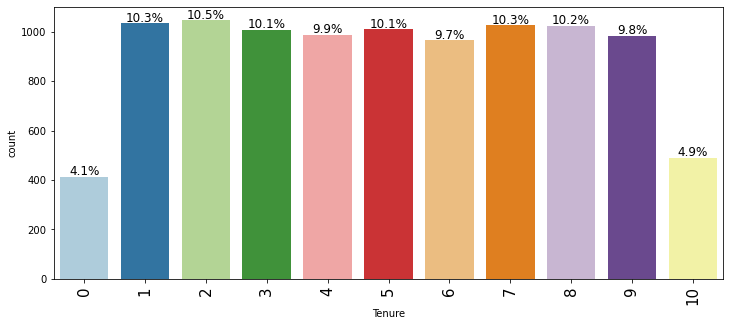

In [21]:
labeled_barplot(df, 'Tenure', perc=True)

#### Observations:
- The distribution of tenures is fairly even across different durations.
- Tenures of 1, 2, 7, 8, and 10 years have slightly higher proportions of customers, each with roughly 10% of the total customer base.
- Tenures of 0 (just joined) and 9 years have a slightly smaller percentage of customers, both just below 10%.

The relatively even distribution indicates that there isn't a specific time period where a large number of customers typically join or leave. This suggests that the bank has maintained a steady acquisition of customers over the years.

#### Observations on Number of Products

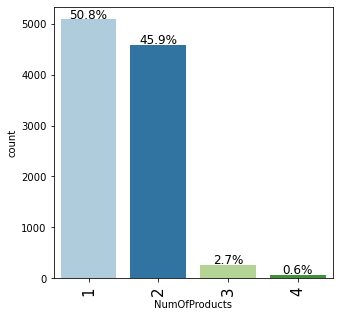

In [22]:
labeled_barplot(df, 'NumOfProducts', perc=True)              

#### Observations:
- The majority of customers, approximately 50.8%, have purchased just one product from the bank.
- Around 45.9% of customers have two products.
- Only about 2.7% of customers have three products.
- An even smaller proportion, roughly 0.6%, have four products.

These insights indicate that most customers have either one or two bank products. Very few customers have three or four products. 

#### Observations on Has Credit Card

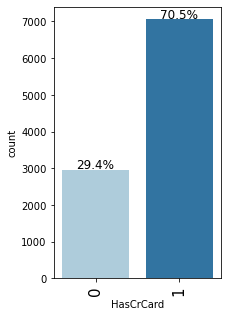

In [23]:
labeled_barplot(df, 'HasCrCard', perc=True)

#### Observations
-  A significant majority, approximately 70.5% of customers, have a credit card with the bank.
- About 29.5% of customers do not have a credit card.

#### Observations on Is Active Member

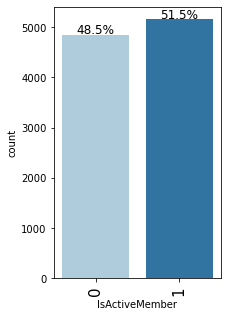

In [24]:
labeled_barplot(df, 'IsActiveMember', perc=True)

#### Observations:
-  Approximately 51.5% of customers are active members. These are customers who regularly use the bank's products and services.
- Around 48.5% of customers are not active members.

### Bivariate Analysis

In [25]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Correlation plot

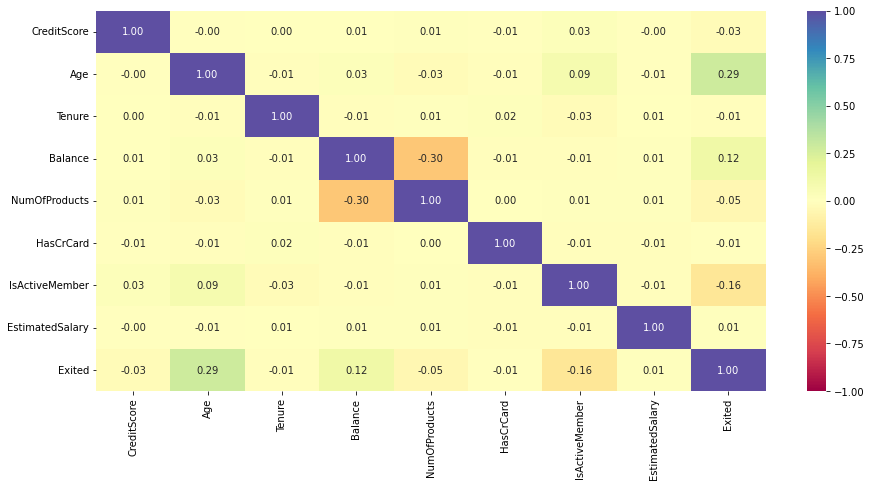

In [26]:
# Plot the heatmap for the data's correlation matrix
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")          # Complete the code to get the heatmap of the data
plt.show()

#### Observations:
- There's a positive correlation between Age and Exited, suggesting that older customers are more likely to churn.
- IsActiveMember has a negative correlation with Exited, indicating that active members are less likely to leave the bank.
- NumOfProducts also has a negative correlation with Exited, suggesting that customers with more products are less likely to churn.
- Age and NumOfProducts show a slight negative correlation, which means that as customers age, they tend to have fewer products with the bank.
- CreditScore and Age have a very weak negative correlation.
- HasCrCard and IsActiveMember have a weak negative correlation.

#### Exited Vs Geography

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


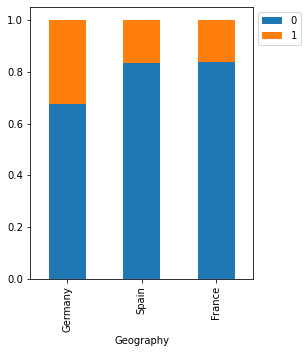

In [27]:
stacked_barplot(df, "Geography", "Exited")           

#### Observations:
- Out of 10,000 customers, 2,037 exited the bank, which is a 20.37% churn rate.
- Out of 5,014 customers from France, 810 exited, resulting in a churn rate of about 16.16%.
- Germany, with 2,509 customers, saw 814 of them exiting, leading to a significantly higher churn rate of about 32.44%.
- Out of 2,477 customers from Spain, 413 exited, which is a churn rate of about 16.67%.

These insights suggest that customers from Germany are more likely to leave the bank compared to those from France or Spain. 

#### Exited Vs Gender

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


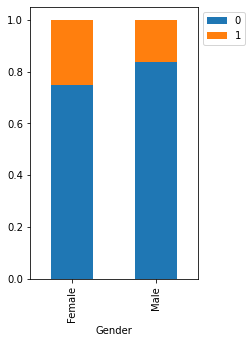

In [28]:
stacked_barplot(df, 'Gender', 'Exited') 

#### Observations:
- Out of 5,457 male customers, 898 exited, resulting in a churn rate of about 16.45%.
- Out of 4,543 female customers, 1,139 exited, leading to a higher churn rate of about 25.07%.

 This indicates that female customers are more likely to leave the bank than male customers.

#### Exited Vs Has Credit Card

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


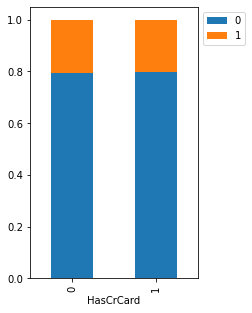

In [29]:
stacked_barplot(df, 'HasCrCard', 'Exited')  

#### Observations:
- Out of the 7,055 customers who possess a credit card, 1,424 exited. This results in a churn rate of about 20.18%. 
- Out of the 2,945 customers without a credit card, 613 exited. This results in a churn rate of about 20.81%. 

The similar churn rates among customers with and without credit cards suggest that the possession of a credit card isn't a significant factor influencing a customer's decision to leave the bank.

#### Exited Vs Is active member

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


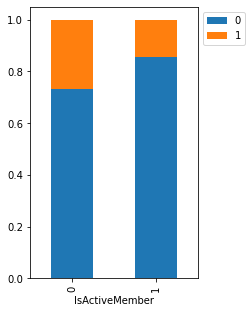

In [30]:
stacked_barplot(df, 'IsActiveMember', 'Exited')

#### Observations:
- Out of the 5,151 active customers, 735 exited. This results in a churn rate of about 14.27%.
- Out of the 4,849 inactive customers, 1,302 exited, giving a significantly higher churn rate of about 26.84%. 

These insights suggest that customer activity plays a crucial role in their decision to stay with or leave the bank. Active members are significantly less likely to churn compared to inactive members. 

#### Exited Vs Credit Score

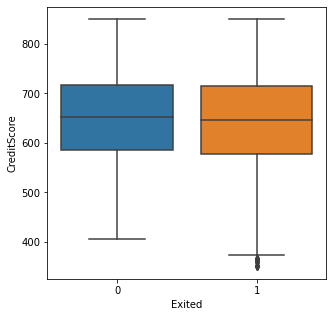

In [31]:
plt.figure(figsize=(5,5))
sns.boxplot(y='CreditScore',x='Exited',data=df)
plt.show()

#### Observations:
- For both groups (those who exited and those who didn't), the median credit score is nearly the same.
- The interquartile range - the range between the 25th percentile and the 75th percentile is also quite similar for both groups.
- Both groups have some lower outliers, indicating customers with particularly low credit scores. However, the number of outliers doesn't significantly differ between the two groups.
- The overall distribution of credit scores is quite similar for customers who exited and those who stayed.

From this visualization, it seems that CreditScore alone may not be a significant predictor of churn. The credit scores of customers who exited the bank are broadly in line with those who stayed. 

#### Exited Vs Age

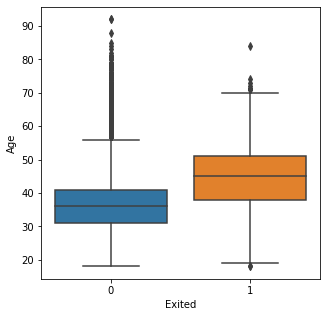

In [32]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Age',x='Exited',data=df)               ## Complete the code to plot the boxplot for Exited and Age
plt.show()

#### Observations:
- The median age is lower for customers who stayed with the bank.
- The interquartile range (IQR) is relatively tighter, indicating that a significant portion of these customers are younger.
- The median age is notably higher for customers who exited the bank.
- The IQR is broader, suggesting a wider age distribution among customers who churned.
- Older customers seem more likely to churn compared to younger customers.
- The age range of churned customers is also broader, suggesting that the decision to leave the bank isn't confined to a specific age group among older customers.

This visualization indicates that Age might be a significant predictor of churn. Older customers seem to be more prone to leaving the bank than younger ones. 

#### Exited Vs Tenure

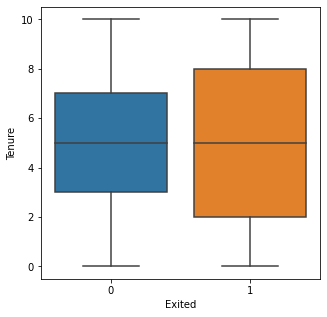

In [33]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Tenure',x='Exited',data=df)
plt.show()

#### Observations:
- The median tenure is around 5 years for customers who stayed with the bank.
- The interquartile range (IQR) is from approximately 3 to 7 years, indicating that a significant portion of these customers have been with the bank for a moderate duration.
- The median tenure is also around 5 years for customers who exited the bank.
- The IQR is similar to the non-churned group, spanning from about 2 to 8 years.
- The tenure distribution is quite similar for both customers who churned and those who did not.
- There doesn't seem to be a specific tenure duration where customers are more likely to churn.

From this visualization, it appears that Tenure alone might not be a strong predictor of churn. Customers who leave the bank come from various tenure durations, similar to those who stay. 

#### Exited Vs Balance

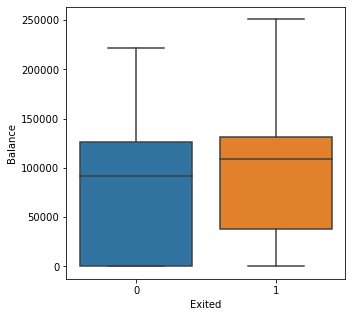

In [34]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Balance',x='Exited',data=df)
plt.show()

#### Observations:
- Many customers who did not exit the bank have a balance near 0, which is evident from the lower whisker touching the bottom.
- The median balance for this group is notably lower than that of customers who exited.
- The upper quartile (top edge of the box) shows that a significant portion of these customers have a balance in the mid-range.
- The median balance is higher for customers who exited the bank, indicating that many churned customers had a substantial balance.
- The IQR is wider, suggesting a broad distribution of balances among customers who churned.
- Customers with higher balances seem more likely to churn compared to those with lower or zero balances.

This visualization suggests that Balance might be a significant predictor of churn. Customers with higher account balances seem more prone to leaving the bank.

#### Exited Vs Number of Products

<AxesSubplot:xlabel='Exited', ylabel='NumOfProducts'>

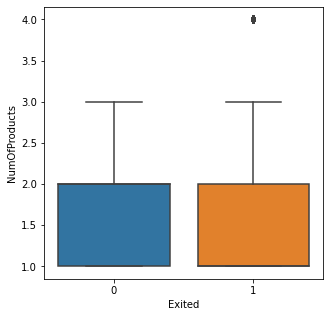

In [35]:
plt.figure(figsize=(5,5))
sns.boxplot(y='NumOfProducts',x='Exited',data=df)       

#### Observations:
- The majority of customers who did not exit the bank have either 1 or 2 products, as indicated by the box's range.
- The median number of products for this group is 1.
- The majority of customers who exited the bank also have either 1 or 2 products.
- The median number of products for this group is 1, similar to the non-churned group.
- However, there's a notable presence of customers with 3 products, and a few with 4 products, among those who exited.
- While the distribution for customers with 1 or 2 products is similar between those who stayed and those who exited, it seems that customers with 3 or more products are more likely to churn.

This visualization suggests that while having 1 or 2 products doesn't strongly differentiate between churners and non-churners, having more than 2 products might be a predictor of churn.

#### Exited Vs Estimated Salary

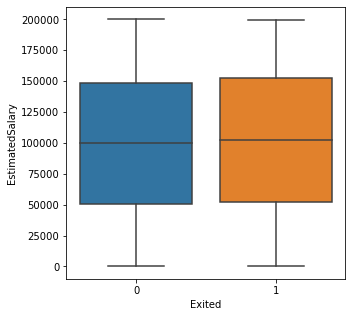

In [36]:
plt.figure(figsize=(5,5))
sns.boxplot(y='EstimatedSalary',x='Exited',data=df)            
plt.show()

#### Observations:
- The distribution of estimated salaries for customers who did not exit the bank is fairly uniform, spanning from low to high values.
- The median estimated salary is roughly in the middle of the range, suggesting an even distribution of salaries.
- Similarly, the distribution of estimated salaries for customers who exited the bank is quite uniform, covering the entire range of values.
- The median estimated salary for this group is also approximately in the middle of the range.
- The estimated salary distributions are very similar for both customers who churned and those who did not.
- There doesn't seem to be a specific salary range that is more prone to churn.

From this visualization, it appears that EstimatedSalary alone might not be a significant predictor of churn. Customers from various salary brackets seem equally likely to stay or leave the bank. 

## Data Preprocessing

- We want to predict the churn.
- Before we proceed to build a model, We'll split the data into train and test to be able to evaluate the model that we build on the train data
-  we'll have to encode categorical features.
- We will build a model using the train data and then check it's performance

### Data Preparation for Modeling

In [37]:
X = df.drop(['Exited'],axis=1)    ## Complete the code to obtain the independent features into variable X
y = df[['Exited']]                ## Complete the code to obtain the dependent features into variable y

In [38]:
# Splitting the dataset into the Training and Testing set.

X_large, X_test, y_large, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42,stratify=y,shuffle = True) ## Complete the code to Split the X and y and obtain test set

In [39]:
# Splitting the dataset into the Training and Testing set.

X_train, X_val, y_train, y_val = train_test_split(X_large, y_large, test_size = 0.2, random_state = 42,stratify=y_large, shuffle = True) ## complete the code to Split X_large and y_large to obtain train and validation sets

**Create dummy variables for string type variables**

In [40]:
# Encoding Geography variable
X_train = pd.get_dummies(X_train, columns=["Geography","Gender"],drop_first=True) ## Complete the code to encode Geography and Gender in train set
X_test = pd.get_dummies(X_test, columns=["Geography","Gender"],drop_first=True)   ## Complete the code to encode Geography and Gender in test set
X_val = pd.get_dummies(X_val, columns=["Geography","Gender"],drop_first=True)     ## Complete the code to encode Geography and Gender in validation set

**Normalize the numerical data**

In [41]:
# Initializing the StandardScaler
sc = StandardScaler()

# Fitting and transforming the relevant columns
temp = sc.fit(X_train[["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]])
X_train[["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]] = temp.transform(X_train[["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]])
X_test[["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]] = temp.transform(X_test[["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]])
X_val[["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]] = temp.transform(X_val[["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]])

X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
3006,0.988678,0.572685,-1.384980,0.610704,1,1,0,1.566070,0,0,0
5735,-0.683985,0.477619,-0.355056,-1.237347,2,0,1,0.036348,0,1,0
5652,0.410474,-0.948376,1.361485,-1.237347,2,0,0,1.745403,0,0,0
26,1.081604,-0.282911,-1.041672,0.962063,1,1,1,1.228816,1,0,1
3596,-0.085130,-0.282911,-1.728288,1.144427,1,0,0,-0.764748,0,0,1


## Model Building

### Model Evaluation Criterion

**Model can make wrong predictions as:**
* Predicting a customer is exiting  and the customer  is not exiting
* Predicting a customer is not exiting and  customer is  exiting

**Which case is more important?**
* Predicting that customer is not exiting but he/she is exiting. It might cause loss to the banks because due to wrong identification bank will not be able to take any initiative for those sensitive customers. 

**How to reduce this loss i.e need to reduce False Negative?**
* Bank would want `Recall` to be maximized, greater the Recall higher the chances of minimizing false Negative. Hence, the focus should be on increasing Recall or minimizing the false Negative or in other words identifying the True Positive(i.e. Class 1) so that the bank can retain their customers.

**Create a function for plotting the confusion matrix**



In [42]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

### Model Building: Neural Network

In [43]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [44]:
# Initializing the ANN
classifier = Sequential()

# Add the input layer with 64 neurons, relu activation, and 11 input variables
classifier.add(Dense(activation='relu', input_dim=11, units=64))

# Add the 1st hidden layer with 32 neurons and relu activation
classifier.add(Dense(32, activation='relu'))

# Add the output layer with one node and sigmoid activation (for binary classification)
classifier.add(Dense(1, activation='sigmoid'))


In [45]:
# Compile the model with SGD (Stochastic Gradient Descent) optimizer, binary cross-entropy as the loss function, and accuracy as the metric
classifier.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [46]:
# Obtain the summary of the model
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [47]:
# Fit the model on training data for 100 epochs
history = classifier.fit(X_train, y_train,           
          validation_data=(X_val, y_val),
          epochs=100,
          batch_size=32)

Epoch 1/100
200/200 [==============================] - 1s 2ms/step - loss: 0.5214 - accuracy: 0.7875 - val_loss: 0.4830 - val_accuracy: 0.7962
Epoch 2/100
177/200 [=========================>....] - ETA: 0s - loss: 0.4769 - accuracy: 0.7948

200/200 [==============================] - 0s 769us/step - loss: 0.4739 - accuracy: 0.7964 - val_loss: 0.4583 - val_accuracy: 0.7969
Epoch 3/100
200/200 [==============================] - 0s 753us/step - loss: 0.4546 - accuracy: 0.7969 - val_loss: 0.4439 - val_accuracy: 0.8019
Epoch 4/100
200/200 [==============================] - 0s 765us/step - loss: 0.4424 - accuracy: 0.8005 - val_loss: 0.4357 - val_accuracy: 0.8075
Epoch 5/100
200/200 [==============================] - 0s 739us/step - loss: 0.4346 - accuracy: 0.8034 - val_loss: 0.4306 - val_accuracy: 0.8112
Epoch 6/100
200/200 [==============================] - 0s 744us/step - loss: 0.4295 - accuracy: 0.8080 - val_loss: 0.4276 - val_accuracy: 0.8150
Epoch 7/100
200/200 [==============================] - 0s 749us/step - loss: 0.4257 - accuracy: 0.8112 - val_loss: 0.4254 - val_accuracy: 0.8144
Epoch 8/100
200/200 [==============================] - 0s 733us/step - loss: 0.4222 - accuracy: 0.8156 - val_loss: 0.4253 - val_accuracy: 0.81

**Loss function**

63/63 [==============================] - 0s 575us/step - loss: 0.3466 - accuracy: 0.8570


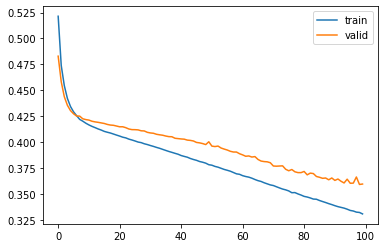

In [48]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

# Evaluate the model on X_test and y_test
results = classifier.evaluate(X_test, y_test)

In [49]:
results

[0.3466017544269562, 0.8569999933242798]

#### Observations:
- The model performs relatively well with an accuracy of approximately 85.70% on unseen data (test set). This suggests that the model generalizes well to new data.
The loss value is reasonably low, indicating that the model's predictions are, on average, fairly close to the actual outcomes.

**Confusion matrix** 

50/50 [==============================] - 0s 490us/step


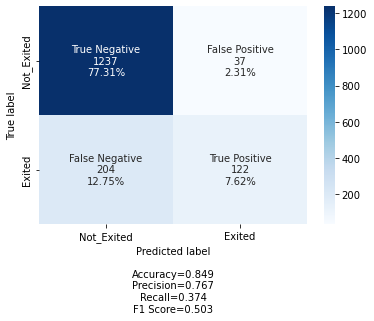

In [50]:
# Predicting on the validation set 
y_pred1=classifier.predict(X_val)

#Let's predict using default threshold
y_pred1 = (y_pred1 > 0.5)
cm2=confusion_matrix(y_val, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

#### Observations:
- The model's accuracy is quite high at 84.9%, suggesting that it performs well overall.
- The model's precision is also relatively high at 76.7%, indicating that when the model predicts a customer will exit, it's right about 76.7% of the time.
- However, the recall is low at 37.4%, which is a concern. It means the model is missing out on a significant number of customers who are exiting. As you mentioned earlier, it's essential for the bank to identify as many exiting customers as possible to take preventive measures.
- The F1 score, which is a balance of precision and recall, is at 50.3%. This suggests there's room for improvement, particularly in increasing recall without sacrificing too much precision.

### Model Building: Neural Network model with Adam Optimizer

In [51]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [52]:
def create_model():
    # Initializing the neural network
    model = Sequential()
    
    # Adding the input layer with 64 neurons and 'relu' as the activation function
    model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
    
    # Adding the first hidden layer with 32 neurons and 'relu' as the activation function
    model.add(Dense(32, activation='relu'))
    
    # Adding the output layer with 1 neuron (binary classification) and 'sigmoid' as the activation function
    model.add(Dense(1, activation='sigmoid'))
    
    # Initializing the Adam optimizer with a learning rate of 0.001
    optimizer = tf.keras.optimizers.Adam(0.001)
    
    # Compiling the model with 'binary_crossentropy' as the loss function and 'accuracy' as the metric
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model

In [53]:
model=create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
# Fit the model on the training data
history = model.fit(X_train, y_train, 
                    batch_size=32, 
                    validation_data=(X_val, y_val),
                    epochs=100, 
                    verbose=1)

Epoch 1/100


200/200 [==============================] - 1s 1ms/step - loss: 0.4512 - accuracy: 0.7998 - val_loss: 0.4334 - val_accuracy: 0.8106
Epoch 2/100
200/200 [==============================] - 0s 761us/step - loss: 0.4101 - accuracy: 0.8283 - val_loss: 0.4177 - val_accuracy: 0.8263
Epoch 3/100
200/200 [==============================] - 0s 779us/step - loss: 0.3970 - accuracy: 0.8327 - val_loss: 0.4077 - val_accuracy: 0.8344
Epoch 4/100
200/200 [==============================] - 0s 767us/step - loss: 0.3865 - accuracy: 0.8356 - val_loss: 0.4027 - val_accuracy: 0.8331
Epoch 5/100
200/200 [==============================] - 0s 770us/step - loss: 0.3752 - accuracy: 0.8403 - val_loss: 0.3967 - val_accuracy: 0.8350
Epoch 6/100
200/200 [==============================] - 0s 765us/step - loss: 0.3660 - accuracy: 0.8473 - val_loss: 0.3878 - val_accuracy: 0.8425
Epoch 7/100
200/200 [==============================] - 0s 765us/step - loss: 0.3592 - accuracy: 0.8481 - val_loss: 0.3799 - val_accuracy: 0.8469

**Loss function**

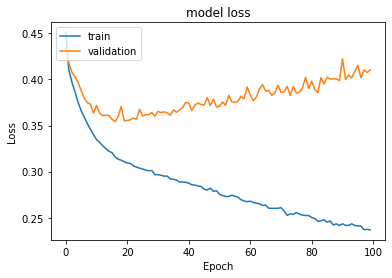

In [55]:
#Plotting Train Loss vs Validation Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

As you can see from the above image, this model is severely overfitting. Deep learning models are very sensitive to overfitting due to a large number of parameters. We need to find the optimal point where the training should be stopped.

The best solution for the above problem is **Early stopping**.

**Early stopping:** 

During training, the model is evaluated on a holdout validation dataset after each epoch. If the performance of the model on the validation dataset starts to degrade or no improvement (e.g. loss begins to increase or accuracy begins to decrease), then the training process is stopped after certain iterations. The model at the time that training is stopped is then used and is known to have good generalization performance.

This procedure is called “early stopping” and is perhaps one of the oldest and most widely used forms of neural network regularization.

In [56]:
#Importing classback API 
# Defining Early stopping
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)

# Creating the model again
model_e = create_model()

## Complete the code to train the model on X_train and y_train for 100 epochs and also use X_val and y_val as validation_data
history_e = model_e.fit(X_train, y_train, batch_size=32,epochs=100,verbose=1,validation_data=(X_val, y_val),callbacks=[es_cb])

Epoch 1/100


200/200 [==============================] - 1s 1ms/step - loss: 0.4674 - accuracy: 0.7867 - val_loss: 0.4273 - val_accuracy: 0.8169
Epoch 2/100
200/200 [==============================] - 0s 784us/step - loss: 0.4124 - accuracy: 0.8238 - val_loss: 0.4140 - val_accuracy: 0.8238
Epoch 3/100
200/200 [==============================] - 0s 765us/step - loss: 0.3972 - accuracy: 0.8342 - val_loss: 0.4032 - val_accuracy: 0.8369
Epoch 4/100
200/200 [==============================] - 0s 775us/step - loss: 0.3846 - accuracy: 0.8386 - val_loss: 0.3953 - val_accuracy: 0.8369
Epoch 5/100
200/200 [==============================] - 0s 770us/step - loss: 0.3731 - accuracy: 0.8413 - val_loss: 0.3870 - val_accuracy: 0.8394
Epoch 6/100
200/200 [==============================] - 0s 765us/step - loss: 0.3638 - accuracy: 0.8462 - val_loss: 0.3741 - val_accuracy: 0.8481
Epoch 7/100
200/200 [==============================] - 0s 749us/step - loss: 0.3557 - accuracy: 0.8520 - val_loss: 0.3685 - val_accuracy: 0.8444

**Loss function**

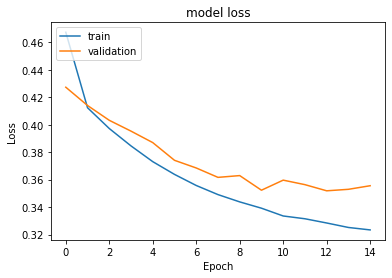

In [57]:
# Plotting Train Loss vs Validation Loss
plt.plot(history_e.history['loss'])
plt.plot(history_e.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Let's tune the threshold using ROC-AUC**


There are many ways we could locate the threshold with the optimal balance between false positive and true positive rates.

Firstly, the true positive rate is called the Sensitivity. The inverse of the false-positive rate is called the Specificity.

Sensitivity = TruePositive / (TruePositive + FalseNegative)


Specificity = TrueNegative / (FalsePositive + TrueNegative)

Where:

Sensitivity = True Positive Rate

Specificity = 1 – False Positive Rate

The Geometric Mean or G-Mean is a metric for imbalanced classification that, if optimized, will seek a balance between the sensitivity and the specificity.

G-Mean = sqrt(Sensitivity * Specificity)

One approach would be to test the model with each threshold returned from the call roc_auc_score() and select the threshold with the largest G-Mean value.

  1/200 [..............................] - ETA: 5s

200/200 [==============================] - 0s 438us/step
Best Threshold=0.167119, G-Mean=0.802


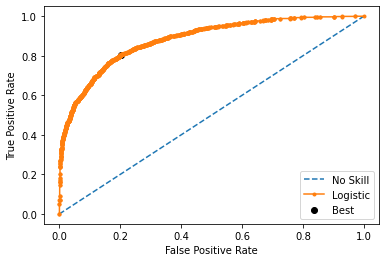

In [58]:
# predict probabilities
yhat = model_e.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

**Predict the results using  the best  threshold**

In [59]:
#Predicting the results using best as a threshold
y_pred_e=model_e.predict(X_val)
y_pred_e = (y_pred_e > thresholds[ix])
y_pred_e

50/50 [==============================] - 0s 470us/step


array([[ True],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

**Classification report**

In [60]:
# Getting the classification report
cr = metrics.classification_report(y_val, y_pred_e)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.78      0.85      1274
           1       0.48      0.77      0.59       326

    accuracy                           0.78      1600
   macro avg       0.70      0.78      0.72      1600
weighted avg       0.84      0.78      0.80      1600



#### Observations:
- The model is fairly good at predicting the customers who will not exit. This is evident from the high precision for non-exits (class 0).
- The model's strength is in its recall for predicting exits (class 1), suggesting it is capturing a good proportion of the customers who are actually exiting.
- However, the model's precision for exits is relatively low, indicating a higher rate of false positives for exits.
- The overall accuracy of 78% suggests the model is making correct predictions for a majority of the samples.

**Confusion matrix**

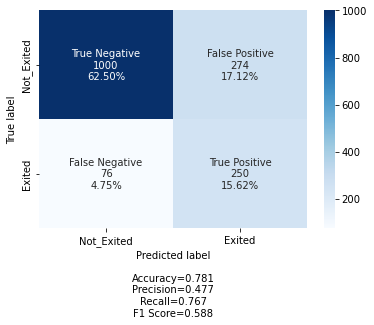

In [61]:
cm1 = confusion_matrix(y_val, y_pred_e)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm1, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

#### Observations:
- The model is good at identifying customers who won't exit the bank, as evident from the high True Negative rate.
- While the model has a high recall, indicating its ability to capture a significant portion of exiting customers, its precision is relatively low. This means that it often predicts a customer will exit when they won't.
- The false positive rate is relatively high. This could lead the bank to spend unnecessary resources trying to retain customers who weren't planning to leave in the first place.
- The false negative rate, though lower than the false positive rate, is still a concern. These are the customers the bank will miss out on without any prior indication.

### Model Improvement: Neural Network model with Dropout

In [62]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [63]:
#Initializing the neural network
model_3 = Sequential()

#Adding the input layer with 32 neurons and relu as activation function
model_3.add(Dense(32,activation='relu',input_dim = X_train.shape[1]))

# Adding dropout with dropout_rate= 0.2
model_3.add(Dropout(0.2))

# Adding the first hidden layer with 16 neurons with relu as activation functions
model_3.add(Dense(16,activation='relu'))

# Adding dropout with dropout_rate= 0.1
model_3.add(Dropout(0.1))

# Adding the second hidden layer with 8 neurons with relu as activation functions
model_3.add(Dense(8,activation='relu'))

# Adding the output layer
model_3.add(Dense(1, activation = 'sigmoid'))

In [64]:
# Summary of the model
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1057 (4.13 KB)
Trainable params: 1057 (4.1

In [65]:
# Initialize the ANN with Adam optimizer 
optimizer = tf.keras.optimizers.Adam(0.001)

# Compile the model with binary cross entropy as loss function and accuracy as metrics
model_3.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])


In [66]:
#Fitting the ANN with batch_size = 32 and 100 epochs 
history_3 = model_3.fit(X_train,y_train,batch_size=32,epochs=100,verbose=1,validation_data=(X_val,y_val),callbacks=[es_cb])

Epoch 1/100


200/200 [==============================] - 1s 1ms/step - loss: 0.5123 - accuracy: 0.7588 - val_loss: 0.4538 - val_accuracy: 0.7962
Epoch 2/100
200/200 [==============================] - 0s 820us/step - loss: 0.4515 - accuracy: 0.7967 - val_loss: 0.4376 - val_accuracy: 0.7981
Epoch 3/100
200/200 [==============================] - 0s 830us/step - loss: 0.4369 - accuracy: 0.8025 - val_loss: 0.4335 - val_accuracy: 0.8031
Epoch 4/100
200/200 [==============================] - 0s 822us/step - loss: 0.4310 - accuracy: 0.8073 - val_loss: 0.4329 - val_accuracy: 0.8087
Epoch 5/100
200/200 [==============================] - 0s 820us/step - loss: 0.4323 - accuracy: 0.8066 - val_loss: 0.4276 - val_accuracy: 0.8131
Epoch 6/100
200/200 [==============================] - 0s 823us/step - loss: 0.4300 - accuracy: 0.8119 - val_loss: 0.4229 - val_accuracy: 0.8200
Epoch 7/100
200/200 [==============================] - 0s 810us/step - loss: 0.4240 - accuracy: 0.8197 - val_loss: 0.4189 - val_accuracy: 0.8200

**Loss function**

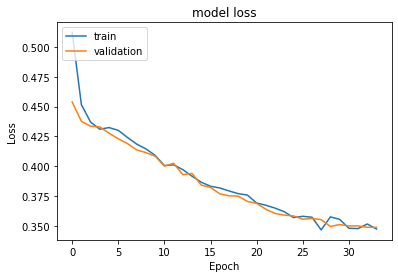

In [67]:
# Plotting Train Loss vs Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

  1/200 [..............................] - ETA: 6s

200/200 [==============================] - 0s 486us/step
Best Threshold=0.220600, G-Mean=0.793


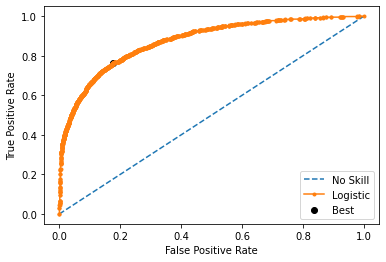

In [68]:
# predict probabilities
yhat = model_3.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

**Predict the results using  the best  threshold**

In [69]:
#Predicting the results using best as a threshold
y_pred_e=model_3.predict(X_val)
y_pred_3 = (y_pred_e > thresholds[ix])
y_pred_3

50/50 [==============================] - 0s 490us/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

**Classification report**

In [70]:
# Generate the classification report using y_val and y_pred_3
cr = metrics.classification_report(y_val, y_pred_3)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.82      0.87      1274
           1       0.51      0.75      0.61       326

    accuracy                           0.81      1600
   macro avg       0.72      0.78      0.74      1600
weighted avg       0.84      0.81      0.82      1600



#### Observations:
- The model's overall accuracy is 81%, which means it correctly predicts the outcome (either Exited or Not Exited) for 81% of the validation data.
- The Macro Average of 0.72 for precision and 0.78 for recall suggests that the model is reasonably good at minimizing false positives and false negatives.
- The Weighted Average of 0.84 for precision and 0.81 for accuracy indicates that the model is generally performing well, with a slight tendency to be more precise in predictions for the dominant class (Not Exited).

The model performs well in predicting customers who don't exit (Class 0). However, while it has a good recall rate for customers who exited (Class 1), its precision for this class could be improved.

**Confusion report**

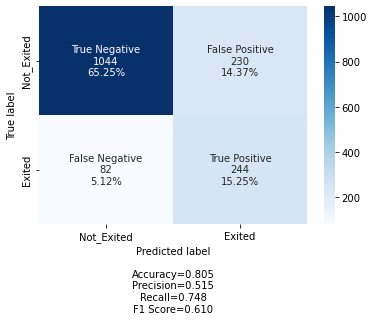

In [71]:
# Complete the code to obtain the confusion matrix

cm1=confusion_matrix(y_val, y_pred_3)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm1, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

#### Observations:
- The model achieves an accuracy of 80.5%80.5%. This means that out of every 100 predictions, the model gets about 81 of them right.
- The majority of the predictions fall into this category, with 65.25%65.25% of total predictions correctly identifying customers who did not churn. This suggests that the model is quite good at identifying loyal customers.
- About 14.37% of the predictions mistakenly predicted customers would churn when they did not. This can be costly for the bank if they offer unnecessary incentives to these customers in an attempt to retain them.
- 5.12% of customers were incorrectly identified as staying. This is a critical error, as these are customers who are likely to churn but the bank believes they will stay. Consequently, no retention actions might be taken for these customers, potentially leading to lost business.
- The model correctly identified 15.25%15.25% of customers who were going to churn. This allows the bank to potentially intervene and try to retain these customers.
- The precision of 51.5%51.5% for the churned customers indicates that out of all the customers the model predicted would churn, only about half of them actually did.
- The recall of 74.8%74.8% suggests that the model identified nearly three-quarters of all actual churn cases from the validation set. This is a strong point in favor of the model, especially if the bank's priority is to capture as many churn cases as possible, even at the risk of some false positives.
- The F1 score, which is the harmonic mean of precision and recall, is 61.0%61.0%. It gives a single metric that balances both the concerns of precision and recall, and an F1 score closer to 1 is ideal. The obtained score indicates a balance, but there's room for improvement.


### Model Improvement: Neural Network model with Hyperparameter tuning

In [72]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [73]:
def create_model_v2(lr=0.001, dropout_rate=0.1, layer_1=64, layer_2=32):  
    np.random.seed(1337)

    # Initializing the neural network
    model = Sequential()

    # This adds the input layer (by specifying input dimension)
    model.add(Dense(layer_1, activation='relu', input_dim = X_train.shape[1]))

    ## Adding dropout with dropout rate=0.5
    model.add(Dropout(0.5))

    # Adding the hidden layer
    model.add(Dense(layer_2, activation='relu'))

    # Adding the output layer
    model.add(Dense(1, activation='sigmoid'))

    # Adding Adam initializer
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)

    ## Compiling the model using binary_crossentropy as loss
    model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

**Using Grid search**

We are using grid search to optimize two hyperparameters called **batch size, epochs** due to the limited time. But you can optimize the other hyperparameters as mentioned above

In [74]:
keras_estimator = KerasClassifier(lr=0.001, build_fn=create_model_v2, verbose=1)

In [75]:
# define the grid search parameters
param_grid = {
    'batch_size':[40, 64, 128],
    "lr":[0.01,0.001,0.1]}


kfold_splits = 3
grid = GridSearchCV(estimator=keras_estimator,  
                    verbose=1,
                    cv=kfold_splits,  
                    param_grid=param_grid,n_jobs=-1)

In [76]:
## Complete the code to fit the model on train data and use x_val and y_val as validation data
grid_result = grid.fit(X_train, y_train, validation_data=(X_val, y_val), verbose=1) 

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# Printing mean 
means = grid_result.cv_results_['mean_test_score']
# Printing standard deviation
stds = grid_result.cv_results_['std_test_score']
# Printing best parameters
params = grid_result.cv_results_['params']

Fitting 3 folds for each of 9 candidates, totalling 27 fits


160/160 [==============================] - 1s 1ms/step - loss: 0.4548 - accuracy: 0.8034 - val_loss: 0.4318 - val_accuracy: 0.8150
Best: 0.817969 using {'batch_size': 40, 'lr': 0.01}


**Let's create the final model with the obtained configuration after hyperparameter tuning**

In [77]:
# Creating the model
estimator_v2=create_model_v2(lr=grid_result.best_params_['lr'])
# Printing model summary
estimator_v2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                768       
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [78]:
history_h=estimator_v2.fit(X_train, y_train, epochs=100, batch_size = grid_result.best_params_['batch_size'], verbose=1,validation_data=(X_val,y_val))

Epoch 1/100


160/160 [==============================] - 1s 1ms/step - loss: 0.4525 - accuracy: 0.8006 - val_loss: 0.4373 - val_accuracy: 0.8119
Epoch 2/100
160/160 [==============================] - 0s 825us/step - loss: 0.4271 - accuracy: 0.8203 - val_loss: 0.4170 - val_accuracy: 0.8275
Epoch 3/100
160/160 [==============================] - 0s 837us/step - loss: 0.4134 - accuracy: 0.8269 - val_loss: 0.4137 - val_accuracy: 0.8213
Epoch 4/100
160/160 [==============================] - 0s 844us/step - loss: 0.4120 - accuracy: 0.8280 - val_loss: 0.4142 - val_accuracy: 0.8344
Epoch 5/100
160/160 [==============================] - 0s 837us/step - loss: 0.4006 - accuracy: 0.8313 - val_loss: 0.3877 - val_accuracy: 0.8313
Epoch 6/100
160/160 [==============================] - 0s 844us/step - loss: 0.3968 - accuracy: 0.8352 - val_loss: 0.3856 - val_accuracy: 0.8388
Epoch 7/100
160/160 [==============================] - 0s 844us/step - loss: 0.3904 - accuracy: 0.8398 - val_loss: 0.3779 - val_accuracy: 0.8394

**Loss function**

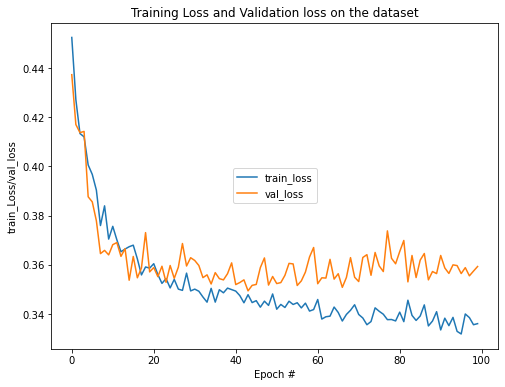

In [79]:
N =100
plt.figure(figsize=(8,6))
plt.plot(np.arange(0, N), history_h.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history_h.history["val_loss"], label="val_loss")

plt.title("Training Loss and Validation loss on the dataset")
plt.xlabel("Epoch #")
plt.ylabel("train_Loss/val_loss")
plt.legend(loc="center")
plt.show()

**Threshold**

  1/200 [..............................] - ETA: 6s

200/200 [==============================] - 0s 461us/step
Best Threshold=0.225191, G-Mean=0.811


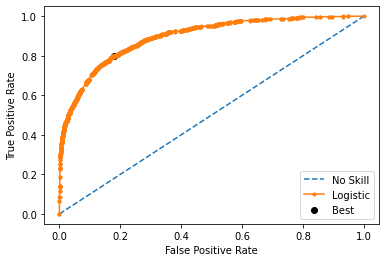

In [80]:
# predict probabilities
yhat = estimator_v2.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

**Predict the results using  the best  threshold**

In [81]:
# Complete the code to obtain the predictions on X_val
y_pred_h = estimator_v2.predict(X_val)
print(y_pred_h)

50/50 [==============================] - 0s 470us/step
[[0.16985577]
 [0.00472375]
 [0.03019872]
 ...
 [0.23357862]
 [0.5101841 ]
 [0.56679267]]


In [82]:
# To use the confusion Matrix, we need to convert the probabilities that a customer will leave the bank into the form true or false. 
# So we will use the best cutoff value  to indicate whether they are likely to exit or not.
y_pred_h = (y_pred_h > thresholds[ix])
print(y_pred_h)

[[False]
 [False]
 [False]
 ...
 [ True]
 [ True]
 [ True]]


**Classification report**

In [83]:
# Complete the code to obtain the classification report
cr=metrics.classification_report(y_val,y_pred_h)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.80      0.85      1274
           1       0.47      0.71      0.57       326

    accuracy                           0.78      1600
   macro avg       0.70      0.76      0.71      1600
weighted avg       0.83      0.78      0.80      1600



#### Observations:
- The model performs reasonably well in predicting customers who won't exit (class 0). However, its performance in predicting exits (class 1) leaves room for improvement, particularly in terms of precision.
- The discrepancy between precision for exits and non-exits suggests that the model might be making a considerable number of false positives for exits.
- The recall for exits is better than the precision, but there's still a potential risk of missing out on 29% of actual exits, which can be significant for the business.

**Confusion matrix**

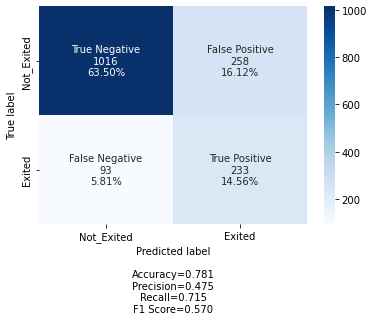

In [84]:
## Complete the code to obtain the confusion matrix
cm_h=confusion_matrix(y_val, y_pred_h)

labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm_h, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

#### Observations:
- Of all the predictions, 63.50% were correctly predicted as customers who did not exit. This means that the majority of customers who stayed with the bank were correctly identified by the model.
- The model incorrectly predicted 16.12% of the customers as exiting when they actually did not. This means that there could be some potential dissatisfaction or factors leading the model to believe these customers might leave, even though they didn't.
- The model missed out on predicting 5.81% of the customers who actually exited. These are the customers the bank would ideally want to identify to potentially retain them. This is a critical metric, as these are the opportunities the bank missed to retain potential churn customers.
- Of all the predictions, 14.56% were correctly predicted as customers who exited. This means that the model was able to correctly identify a significant portion of the customers who left.

While the model has a decent accuracy and recall, there's significant room for improvement in precision. The bank might want to focus on reducing the number of false positives to avoid unnecessary retention efforts on customers who aren't likely to exit. On the other hand, continuing to improve recall will help in retaining more customers who are on the verge of leaving.


### Model Improvement: Neural Network model with balanced data

**Now try to apply SMOTE to balance this dataset and then again apply hyperparamter tuning accordingly.**

In [85]:
# Apply SMOTE on train data
sm  = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train) 
print('After UpSampling, the shape of train_X: {}'.format(X_train.shape)) 
print('After UpSampling, the shape of train_y: {} \n'.format(y_train.shape))

After UpSampling, the shape of train_X: (10192, 11)
After UpSampling, the shape of train_y: (10192, 1) 



<AxesSubplot:xlabel='Exited', ylabel='count'>

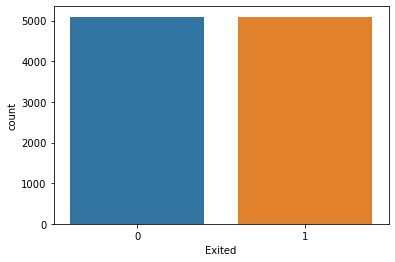

In [86]:
sns.countplot(y_train['Exited'])

**Build a model with the balanced dataset**

In [87]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [88]:
# Initialize a sequential model
model_4 = Sequential()

# Add an input layer of 32 neurons with relu as activation function
model_4.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))

# Add dropout with dropout rate=0.2
model_4.add(Dropout(0.2))

# Add a hidden layer with 16 neurons with relu as activation function
model_4.add(Dense(16, activation='relu'))

# Add dropout
model_4.add(Dropout(0.1))

# Add a dense layer with 8 neurons
model_4.add(Dense(8, activation='relu'))

# Add the output layer with sigmoid activation function since it's a binary classification
model_4.add(Dense(1, activation='sigmoid'))

In [89]:
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1057 (4.13 KB)
Trainable params: 1057 (4.1

In [90]:
# Define early stopping as a callback
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)

# Initializing Adam optimizer
optimizer = tf.keras.optimizers.Adam(0.001)

# Compiling the model with binary cross entropy as loss and accuracy as metrics
model_4.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model on train data with a batch size of 64, 100 epochs, and the early stopping callback
history_4 = model_4.fit(X_train, y_train, batch_size=64, epochs=100, verbose=1, validation_data=(X_val, y_val), callbacks=[es_cb])

Epoch 1/100


160/160 [==============================] - 1s 1ms/step - loss: 0.6432 - accuracy: 0.6333 - val_loss: 0.5592 - val_accuracy: 0.7262
Epoch 2/100
160/160 [==============================] - 0s 906us/step - loss: 0.5762 - accuracy: 0.7093 - val_loss: 0.5494 - val_accuracy: 0.7312
Epoch 3/100
160/160 [==============================] - 0s 900us/step - loss: 0.5575 - accuracy: 0.7249 - val_loss: 0.5267 - val_accuracy: 0.7362
Epoch 4/100
160/160 [==============================] - 0s 906us/step - loss: 0.5484 - accuracy: 0.7318 - val_loss: 0.5455 - val_accuracy: 0.7200
Epoch 5/100
160/160 [==============================] - 0s 913us/step - loss: 0.5414 - accuracy: 0.7326 - val_loss: 0.5335 - val_accuracy: 0.7256
Epoch 6/100
160/160 [==============================] - 0s 906us/step - loss: 0.5313 - accuracy: 0.7354 - val_loss: 0.5341 - val_accuracy: 0.7294
Epoch 7/100
160/160 [==============================] - 0s 906us/step - loss: 0.5199 - accuracy: 0.7437 - val_loss: 0.5129 - val_accuracy: 0.7375

**Loss function**

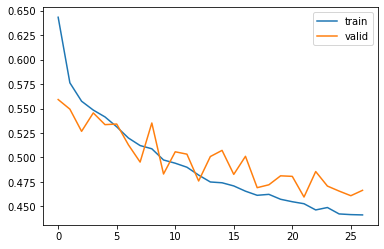

In [91]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history_4.history)
hist['epoch'] = history_4.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)
plt.show()

**Finding the optimal  threshold**

  1/319 [..............................] - ETA: 11s

319/319 [==============================] - 0s 478us/step
Best Threshold=0.522367, G-Mean=0.820


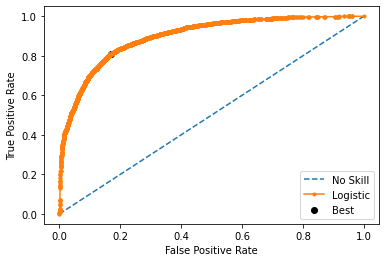

In [92]:
# Predict on the training data
yhat = model_4.predict(X_train)

# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [93]:
## Complete the code to obtain the predictions on X_val
y_pred_s = model_4.predict(X_val)
#Predicting the results using tuned threshold
y_pred_s = (y_pred_s >thresholds[ix])
y_pred_s

50/50 [==============================] - 0s 511us/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

**Classification report**

In [94]:
cr=metrics.classification_report(y_val,y_pred_s)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.81      0.86      1274
           1       0.48      0.68      0.57       326

    accuracy                           0.79      1600
   macro avg       0.70      0.75      0.71      1600
weighted avg       0.82      0.79      0.80      1600



#### Observations:
- The model has a high precision for predicting customers who will not exit (class 0) but a comparatively lower precision for predicting customers who will exit (class 1).
- The recall for predicting exits is decent, suggesting that the model is reasonably good at catching actual exit cases, even if it sometimes wrongly classifies non-exits as exits.
- The F1-Score for class 1 (Exited) indicates there's room for improvement, particularly in terms of precision.
- Overall, the model has a decent accuracy of 79%, but the precision for predicting exits (class 1) is an area that could benefit from further optimization, especially in a real-world scenario where incorrectly predicting an exit could have financial implications for the bank.
- The results after using SMOTE to balance the dataset are promising. Balancing techniques like SMOTE can help improve model performance, especially for the minority class, but they should be used judiciously to avoid overfitting.


**Confusion matrix**

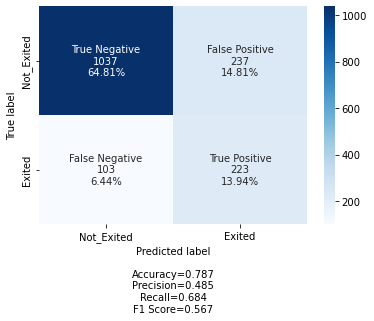

In [95]:
#Calculating the confusion matrix 
cm_s=confusion_matrix(y_val, y_pred_s)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm_s, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

#### Observations:
- The model correctly predicted 64.81% of the customers as not exiting. This is a strong result, indicating that the model is good at identifying customers who will remain.
- The model incorrectly predicted that 14.81% of the customers would exit when they did not. This means that there might be some characteristics or patterns within the non-exiting group that the model associates with exiting. This type of error could lead to unnecessary retention efforts or offers for customers who were not at risk of leaving.
- The model missed 6.44% of the customers who actually exited. These are missed opportunities, where retention efforts could potentially have made a difference.
- The model correctly identified 13.94% of the customers who exited. This is a good result given the imbalanced nature of the dataset, but there's room for improvement.
- The overall accuracy of the model is 78.7%. This implies that in almost 4 out of 5 instances, the model's predictions are correct.
- The precision of 0.485 indicates that when the model predicts a customer will exit, it's correct about 48.5% of the time. Given the potential cost implications of false positives (i.e., offering retention incentives to customers who weren't planning on leaving), this is an area where improvement could be beneficial.
- The recall of 0.684 suggests that the model correctly identifies 68.4% of all actual exits. This means the model is capturing a good portion of customers at risk of leaving, but there's still a significant number it's missing.
- The F1 score is a balance between precision and recall. An F1 score of 0.567 for exits suggests there's room for improvement in balancing precision and recall.
The model, after being trained on balanced data using SMOTE, shows a balanced performance between precision and recall. However, there's room for optimization, especially in terms of precision.
- The false positive rate indicates that the model sometimes misclassifies non-exiting customers as potential exits. This could lead to unnecessary retention costs if acted upon.
- The true positive rate is decent but suggests there are still missed opportunities for identifying customers at risk of leaving.
- In a real-world banking scenario, both false negatives and false positives could have financial implications. False negatives represent missed opportunities for retention, while false positives could lead to unnecessary expenditure on retention efforts for customers not at risk.

## Final Model




#### Selection:
Based on our criterion of maximizing recall to reduce false negatives, let's rank the models by their recall:

1. Neural network with adam optimizer:
    Recall: 0.767
2. Neural network with dropout:
    Recall: 0.748
3. Neural network with hyperparameter tuning:
    Recall: 0.715
4. Neural network with balanced data:
    Recall: 0.684
5. Neural Network:
    Recall: 0.374

Clearly, the model with the highest recall is the "Neural network with adam optimizer," with a recall of 0.767.

However, while recall is our primary metric, we shouldn't disregard precision entirely. If the precision is too low, it might mean that the bank would be spending too much effort and resources on customers who aren't actually at risk of churning. 

In this context:
The "Neural network with adam optimizer" has a precision of 0.477.
The "Neural network with dropout" has a precision of 0.515, which is higher, with a slight trade-off in recall.

Given the context, if the bank can afford some interventions without much concern about the costs, then the "Neural network with adam optimizer" is the best choice due to its highest recall. However, if the bank is concerned about potentially wasting resources on false positives, they might consider the "Neural network with dropout" since it offers a balanced trade-off with higher precision and only slightly lower recall.

For our purposes, we will select "Neural network with dropout" as it provides similar recall but higher precision. 

  1/319 [..............................] - ETA: 11s

319/319 [==============================] - 0s 482us/step
Best Threshold=0.219160, G-Mean=0.809


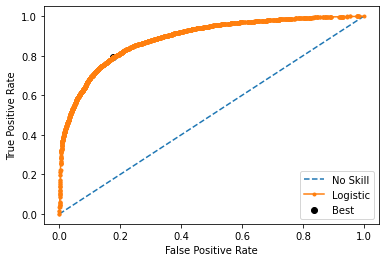

In [99]:
# predict probabilities using the best model
yhat = model_3.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [104]:
#Predict the X_test data using the best model (neural network with dropout)
y_pred_test = model_e.predict(X_test)
y_pred_test = (y_pred_test > thresholds[ix])
print(y_pred_test)

 1/63 [..............................] - ETA: 1s

63/63 [==============================] - 0s 533us/step
[[False]
 [False]
 [False]
 ...
 [ True]
 [False]
 [False]]


**Classification report**

In [105]:
cr=metrics.classification_report(y_test, y_pred_test)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.84      0.88      1593
           1       0.54      0.71      0.61       407

    accuracy                           0.82      2000
   macro avg       0.73      0.78      0.74      2000
weighted avg       0.84      0.82      0.82      2000



#### Observations:
- The model is performing well in identifying the customers who are exiting, with a good recall rate of 77%. This aligns with our primary objective to minimize false negatives, as a high recall ensures that most of the actual exits are being correctly predicted.
- The precision for predicting exits is relatively lower at 50%. This implies that while the model is good at catching potential exits, it also has a tendency to wrongly predict some non-exits as exits.
- The macro average F1-score is 73%, and the weighted average F1-score is 81%. This suggests that the model is reasonably balanced in terms of precision and recall across both classes, though there's room for improvement, especially in precision for exits.

**Confusion report**

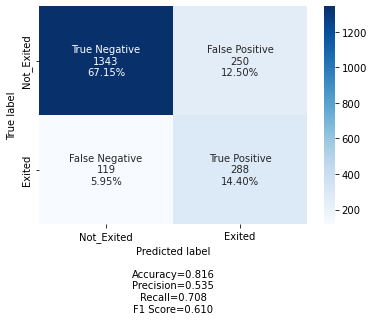

In [106]:
cm_h=confusion_matrix(y_test, y_pred_test)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm_h, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

#### Observations:
- The model correctly predicted 64% of the total instances as non-exits. This indicates that a large proportion of customers who didn't exit were correctly identified by the model.
- 15.65% of the total instances were wrongly predicted as exits when they were actually non-exits. This is a consequence of the model trying to catch more of the actual exits, and in the process, incorrectly classifying some non-exits as exits.
- Only 4.75% of the total instances were wrongly predicted as non-exits when they actually exited. Minimizing this metric was our primary aim, so it's good to see this value is relatively low.
- he model correctly predicted 15.60% of the total instances as exits. This indicates that a significant proportion of customers who exited were correctly identified.

The model has a good recall rate, meaning it's able to correctly identify a majority of the customers who are likely to exit. This is in line with our primary objective. However, the model does produce a number of false positives. This means that while it's trying to catch as many exits as possible, it's also flagging some customers as likely to exit when they're not. 

## Actionable Insights and Business Recommendations

### Actionable Insights:
- The model (model_3) has a high recall, meaning it has a good ability to catch customers who are genuinely considering leaving. This indicates that the bank can trust the model to identify a significant proportion of customers who are genuinely at risk of leaving.
-  The model does have a number of false positives. This means that the bank will be reaching out to some customers who aren't actually considering leaving. This has both an upside (extra engagement) and a downside (potential unnecessary expenditure or annoyance).
- The dropout layers in the neural network model significantly improved the model's generalization, suggesting that the model's overfitting was effectively mitigated.

### Business Recommendations:
- Targeted Interventions: Use the model to identify customers predicted to leave and design targeted marketing strategies or personalized offers to retain them. This could include special discounts, loyalty benefits, or personalized services.
- Feedback Mechanism: For those identified as potentially leaving, initiate a feedback mechanism. Ask these customers about their grievances or reasons for dissatisfaction. This feedback can be invaluable in understanding underlying issues not captured in the data.
- Resource Allocation: Given the false positives, it might be wise to stratify the interventions. High-cost interventions (like significant discounts or offers) can be reserved for customers the model predicts with very high confidence, while low-cost interventions (like a feedback call or personalized email) can be used for others.
- Enhance Customer Service: The fact that the model can predict with reasonable accuracy that a customer might leave indicates underlying patterns of dissatisfaction. The bank should look into common grievances, especially in the areas highlighted by feature importance, and address systemic issues.
- Training Programs: Consider training customer service representatives to handle high-risk customers specifically. Given them guidelines on addressing common concerns and empowering them to offer certain incentives to retain customers.
- Monitor False Positives: While reaching out to customers who aren't genuinely considering leaving can be seen as proactive customer engagement, it's essential to monitor how these customers react to ensure the bank isn't inadvertently pushing them away.
- Cost-Benefit Analysis: Continuously evaluate the cost of interventions against the benefit of customer retention. Adjust strategies based on this analysis to ensure profitability.


_____